## Importing libraries and reading data

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [99]:
bank = pd.read_csv('bank_new.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,NaN,4,-1,0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no


In [8]:
bank.shape

(4521, 17)

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4261.000000,4437.000000,4521.000000,4427.000000,4521.000000,4521.000000,4521.000000
mean,41.179535,1420.179851,15.915284,264.670431,2.793630,39.766645,0.542579
std,10.543468,3013.249912,8.247667,260.517101,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1469.000000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [3]:
bank.isna().sum()

age          260
job            0
marital        0
education      0
default        0
balance       84
housing        0
loan           0
contact        0
day            0
month          0
duration      94
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

##### Dropping time series variables and job description 

In [100]:
bank = bank.drop(['job','day','month'], axis=1)

##### Creating dummy variables for categorical variables

In [101]:
pd.set_option('display.max_columns', None)
bank = pd.get_dummies(bank, columns = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first = True)

##### Mapping target valriable to 1 and 0

In [198]:
bank['y'] = bank.y.map({'yes':1, 'no':0})

##### Creating a list of numerical variables to find the correlation

In [103]:
bank_numerical = bank[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

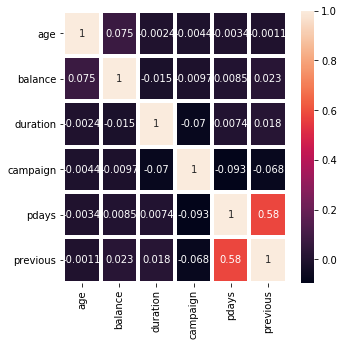

In [104]:
a = bank_numerical.corr()
fig=plt.figure(figsize=(5,5))
sns.heatmap(a,annot= True,linewidths=3)

##### There is no correlation between the variables, 0.58 is not being considered as high correlation in this case.

### Splitting the data into Train and Test

In [105]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = bank.drop('y',axis=1)
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

### Data Imputation 

In [106]:
#Replacing blanks in age column with its median in Train and Test data
X_train['age'].fillna(X_train['age'].median(), inplace = True) 

In [107]:
X_test['age'].fillna(X_test['age'].median(), inplace = True) 

In [108]:
#Replacing blanks in balance column with its median in Train and Test data
X_train['balance'].fillna(X_train['balance'].median(), inplace = True) 

In [109]:
X_test['balance'].fillna(X_test['balance'].median(), inplace = True) 

In [110]:
#Replacing blanks in duration column with its median in Train and Test data
X_train['duration'].fillna(X_train['duration'].median(), inplace = True) 

In [111]:
X_test['duration'].fillna(X_test['duration'].median(), inplace = True)

### Feature scaling using MinMaxScaler

In [112]:
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_train[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = sc.fit_transform(X_train[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
X_test[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = sc.transform(X_test[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

## <font color=blue>1. SVC with kernels = linear, rbf, poly </font>

In [494]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 0.8927
Test score: 0.8939


###### This is an underfitting model as the train score is less than the test score

### SVC Confusion matrix

In [233]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       803
           1       0.62      0.15      0.24       102

   micro avg       0.89      0.89      0.89       905
   macro avg       0.76      0.57      0.59       905
weighted avg       0.87      0.89      0.86       905

accuracy: 0.8939


### SVC Gridsearch

In [230]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
            {'C': [1, 10, 100], 'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

In [231]:
accuracy = grid_search.best_score_
accuracy

0.8987831858407079

### Fitting SVC with the best parameters from Gridsearch

In [390]:
# Fitting Kernel SVM to the Training set with the grid search parameters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.2, C = 10)
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 0.9043
Test score: 0.8972


### SVC Cross-Validation (kernel = 'rbf', gamma = 0.2, C = 10)

In [391]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8927
Avg Test Score:0.8928


In [379]:
from sklearn.svm import SVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_linear = []
train_score_rbf = []
train_score_poly = []
test_score_linear = []
test_score_rbf = []
test_score_poly = []

for c in c_range:
    linear = SVC(kernel = 'linear', C = c)
    rbf = SVC(kernel = 'rbf', C = c, gamma = 0.2)
    poly = SVC(kernel = 'poly', C = c)
    linear.fit(X_train, y_train)
    rbf.fit(X_train, y_train)
    poly.fit(X_train, y_train)
    train_score_linear.append(linear.score(X_train, y_train))
    train_score_rbf.append(rbf.score(X_train, y_train))
    train_score_poly.append(poly.score(X_train, y_train))
    test_score_linear.append(linear.score(X_test, y_test))
    test_score_rbf.append(rbf.score(X_test, y_test))
    test_score_poly.append(poly.score(X_test, y_test))
    
            

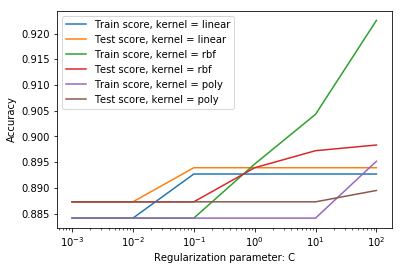

In [380]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_linear, label = 'Train score, kernel = linear')
plt.plot(c_range, test_score_linear, label = 'Test score, kernel = linear')
plt.plot(c_range, train_score_rbf, label = 'Train score, kernel = rbf')
plt.plot(c_range, test_score_rbf, label = 'Test score, kernel = rbf')
plt.plot(c_range, train_score_poly, label = 'Train score, kernel = poly')
plt.plot(c_range, test_score_poly, label = 'Test score, kernel = poly')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

- Graph shows that C=100 gives best test accuracy but this should be verified with cross-validation 

In [392]:
# Fitting Kernel SVM to the Training set with the grid search parameters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.2, C = 100)
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 0.9226
Test score: 0.8983


### SVC Cross-Validation (kernel = 'rbf', gamma = 0.2, C = 100)

In [393]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8957
Avg Test Score:0.8829


### SVM-Kernal Summary

- From the gridsearch, the best parameters are: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}.
- A visual representation of various kernels with parameters shows that C:100, gamma:0.2, kernal:rbf improves the test accuracy but with these parameters, the average test accuracy decreases. 
- The best train and test accuracies of SVM-kernal are Train score: 0.9043, Test score: 0.8972.
- Average Train and test scrores are Avg Train Score:0.8927, Avg Test Score:0.8928    

## <font color=blue>2. Logistic Regression  </font>

In [493]:
# Fitting logistic regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression()
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.8999
Test score: 0.8972


### Logistic regression confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = classifier_Log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       803
           1       0.64      0.21      0.31       102

   micro avg       0.90      0.90      0.90       905
   macro avg       0.77      0.60      0.63       905
weighted avg       0.88      0.90      0.87       905

accuracy: 0.8972


### Logistic regression Gridsearch

In [365]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l2','l1']}]
grid_search = GridSearchCV(estimator = classifier_Log,
                           param_grid = parameters,
                           scoring = 'accuracy', cv=5, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [359]:
accuracy = grid_search.best_score_
accuracy

0.9034845132743363

### Fitting Logistic regression with the best parameters from Gridsearch

In [398]:
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression(penalty = 'l1', C = 1)
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.9035
Test score: 0.8983


### Logistic Cross validation (penality:l1, C:1)

In [399]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier_Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier_Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9027
Avg Test Score:0.8972


In [363]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

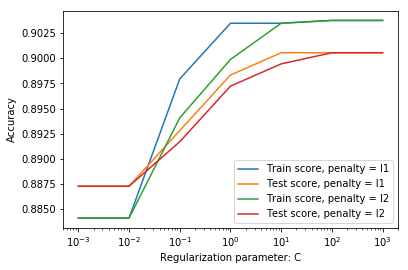

In [366]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

- This graph shows that the test accuracy peaks at C=10 and penalty= l1,this should be verified with cross-validation.

In [400]:
# Fitting the parameters from the graph
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression(penalty = 'l1', C = 10)
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.9035
Test score: 0.9006


### Logistic regression Cross-Validation (penalty:l1, C:10)

In [401]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier_Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier_Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9007
Avg Test Score:0.8950


### Logistic Regression Summary

- Though the Logistic regression yields high test accuracy at penalty=l1, C = 10 as shown, the average test accuracy is less than penalty =l1, C = 1 parameters' average test accuracy.
- The best parameters for Logistic Regression are {'C': 1, 'penalty': 'l1'}
- Before parameter tuning: Train score: 0.8999, Test score: 0.8972
- After parameter tuning: Train score: 0.9035, Test score: 0.8983
- Average scores: Avg Train Score:0.9027, Avg Test Score:0.8972

##  <font color=blue>3. LinearSVC  </font>


In [492]:
from sklearn.svm import LinearSVC

clf = LinearSVC(dual = False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9002
Test score: 0.8994


### LinearSVC Confusion matrix

In [429]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       803
           1       0.65      0.24      0.35       102

   micro avg       0.90      0.90      0.90       905
   macro avg       0.78      0.61      0.65       905
weighted avg       0.88      0.90      0.88       905

accuracy: 0.8994


### LinearSVC Gridsearch

In [430]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [417]:
accuracy = grid_search.best_score_
accuracy

0.9007190265486725

### Fitting LinearSVC with best parameters from gridsearch

In [431]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty = 'l1', C= 1, dual=False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9004
Test score: 0.8994


### LinearSVC Cross-validation

In [432]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(clf,X_train,y_train,cv=5)
test_score_list = cross_val_score(clf,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9004
Avg Test Score:0.8939


In [425]:
from sklearn.svm import LinearSVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    lin_l1 = LinearSVC(penalty = 'l1', C = c, dual = False)
    lin_l2 = LinearSVC(penalty = 'l2', C = c, dual = False)
    lin_l1.fit(X_train, y_train)
    lin_l2.fit(X_train, y_train)
    train_score_l1.append(lin_l1.score(X_train, y_train))
    train_score_l2.append(lin_l2.score(X_train, y_train))
    test_score_l1.append(lin_l1.score(X_test, y_test))
    test_score_l2.append(lin_l2.score(X_test, y_test))

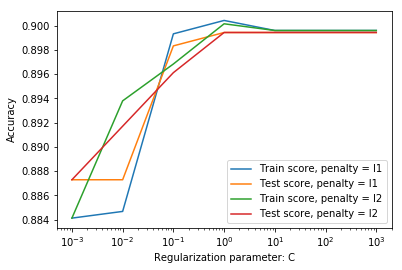

In [426]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### Fitting LinearSVC with l2 penalty to check the average scores

In [433]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty = 'l2', C= 1, dual=False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9002
Test score: 0.8994


### LinearSVC Cross-Validation with l2 penalty 

In [434]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(clf,X_train,y_train,cv=5)
test_score_list = cross_val_score(clf,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8996
Avg Test Score:0.8950


### Linear SVC Summary

- At C=1, both l1 and l2 yield same test accuracies, but l2 yields high average test accuracy.
- Best parameters for Linear SVC are {C=1, penalty='l2'}.
- Best accuracies are: Train score: 0.9002, Test score: 0.8994
- Best average scores are: Avg Train Score:0.8996 Avg Test Score:0.8950

##  <font color=blue>4. KNN  </font>

In [491]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9112
Test score: 0.8873


### KNN Confusion Matrix

In [436]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       803
           1       0.50      0.16      0.24       102

   micro avg       0.89      0.89      0.89       905
   macro avg       0.70      0.57      0.59       905
weighted avg       0.86      0.89      0.86       905

accuracy: 0.8873


### KNN Gridsearch

In [438]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': list(range(3,10)), 'leaf_size': list(range(1,40)), 'weights':['uniform', 'distance'], 'p': [1,2], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [254]:
accuracy = grid_search.best_score_
accuracy

0.8896570796460177

### Fitting KNN with the best parameters from Gridsearch

In [455]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size= 1, n_neighbors = 9, p = 1, weights = 'uniform')
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9007
Test score: 0.8895


### KNN Cross-validation with leaf_size= 1, n_neighbors = 9, p = 1, weights = 'uniform'

In [447]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8886
Avg Test Score:0.8829


### Finding best K using visualization 

In [458]:
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn = KNeighborsClassifier(leaf_size= 1, n_neighbors = k, p = 1, weights = 'uniform')
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

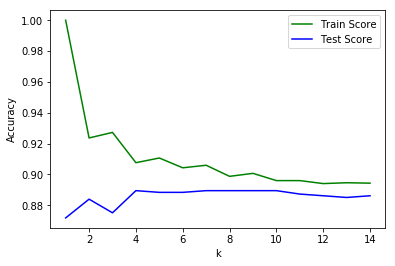

In [459]:
x_axis = range(1,15)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

##### Test score peaks at k=4 

In [462]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors = 4, p = 1, weights = 'uniform')
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9076
Test score: 0.8895


### KNN Cross-Validation with leaf_size= 1, n_neighbors = 4, p = 1, weights = 'uniform'

In [463]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8872
Avg Test Score:0.8840


### KNN Summary

- Though the test accuracies are same at k = 9 and 4, the average test accuracy when k=4 is higher.
- The best parameters are leaf_size= 1, n_neighbors = 4, p = 1, weights = 'uniform'
- The best accuracies are: Train score: 0.9076, Test score: 0.8895
- The best average scores are: Avg Train Score:0.8872, Avg Test Score:0.8840

##  <font color=blue>5. Decision Tree  </font>

In [486]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.8796


### Decision Tree Confusion matrix

In [259]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       803
           1       0.43      0.37      0.40       102

   micro avg       0.87      0.87      0.87       905
   macro avg       0.67      0.65      0.66       905
weighted avg       0.87      0.87      0.87       905

accuracy: 0.8729


### Decision Tree Gridsearch

In [487]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
parameters = [{"max_depth": [1,2,3,4,5,6,7], "criterion": ["gini", "entropy"]}]
grid_search = GridSearchCV(estimator = dtree,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [488]:
accuracy = grid_search.best_score_
accuracy

0.9001659292035398

### Fitting Decision Tree with the best parameters from Gridsearch

In [489]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 0.9038
Test score: 0.8972


### Decision Tree Cross-Validation

In [490]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(dtree,X_train,y_train,cv=5)
test_score_list = cross_val_score(dtree,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8977
Avg Test Score:0.8928


In [501]:
from sklearn.tree import DecisionTreeClassifier

depth = [1,2,3,4,5,6,7]
train_score_g = []
train_score_e = []
test_score_g = []
test_score_e = []

for d in depth:
    dec_g = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dec_e = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dec_g.fit(X_train, y_train)
    dec_e.fit(X_train, y_train)
    train_score_g.append(dec_g.score(X_train, y_train))
    train_score_e.append(dec_e.score(X_train, y_train))
    test_score_g.append(dec_g.score(X_test, y_test))
    test_score_e.append(dec_e.score(X_test, y_test)) 

Text(0, 0.5, 'Accuracy')

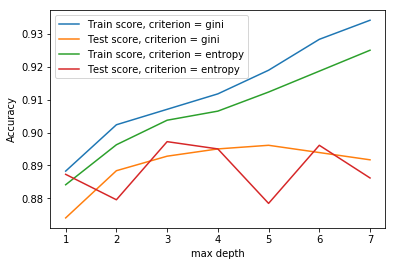

In [502]:
x_axis = range(1,8)
%matplotlib inline
plt.plot(x_axis, train_score_g, label = 'Train score, criterion = gini')
plt.plot(x_axis, test_score_g, label = 'Test score, criterion = gini')
plt.plot(x_axis, train_score_e, label = 'Train score, criterion = entropy')
plt.plot(x_axis, test_score_e, label = 'Test score, criterion = entropy')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')


### Decision Tree summary

- Both the graph and gridsearch show that the best parameters are criterion = 'entropy', max_depth = 3
- The best accuracy scores are: Train score: 0.9038, Test score: 0.8972
- The best average scores are: Avg Train Score:0.8977, Avg Test Score:0.8928

## Models Summary

In [497]:
Models= {'Models':['SVC Kernels','Logistic Regrerssion','Linear SVC', 'KNN','Decision Tree'], 'Without_Hyperparameter_Tuning':[0.8939,0.8972,0.8994,0.8873,0.8796],
          'With_Hyperparameter_Tuning': [0.8972,0.8983,0.8994,0.8895,0.8972], 'Average Test score': [0.8928,0.8972,0.8950,0.8840,0.8929]}
Models_scores = pd.DataFrame(Models)
Models_scores

,Models,Without_Hyperparameter_Tuning,With_Hyperparameter_Tuning,Average Test score
0,SVC Kernels,0.8939,0.8972,0.8928
1,Logistic Regrerssion,0.8972,0.8983,0.8972
2,Linear SVC,0.8994,0.8994,0.8950
3,KNN,0.8873,0.8895,0.8840
4,Decision Tree,0.8796,0.8972,0.8929


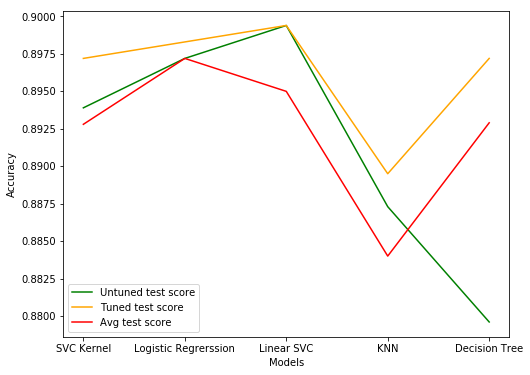

In [496]:
import matplotlib.pyplot as plt
Models = ['SVC Kernel','Logistic Regrerssion','Linear SVC', 'KNN','Decision Tree']
Without_Hyperparameter = [0.8939,0.8972,0.8994,0.8873,0.8796]
With_Hyperparameter = [0.8972,0.8983,0.8994,0.8895,0.8972]
Average_Test_score = [0.8928,0.8972,0.8950,0.8840,0.8929]

fig=plt.figure(figsize=(8,6))
plt.plot(Models,Without_Hyperparameter, label = 'Untuned test score', color='g')
plt.plot(Models, With_Hyperparameter, label = 'Tuned test score', color='orange')
plt.plot(Models, Average_Test_score, label = 'Avg test score', color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()

- All the models have almost similar accuracies, LinearSVC has the highest accuracy with Logistic next to it.
- But, the average test accuracy of Logistic is better than LinearSVC, so, Logistic regression is the best model.